In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-accidents/US_Accidents_Dec20.csv


# US Accidents Analysis

## Importing Required Libraries


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

##  Data Handeling

### Loading Dataset into Pandas Dataframe

In [5]:
data_filepath = "../input/us-accidents/US_Accidents_Dec20.csv"
data = pd.read_csv(data_filepath)
data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


### Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

#### Columns in dataframe

In [7]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### Statistical Description of each column

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,2716477.0,208.351719,21.244129,200.000000,201.000000,201.000000,201.00000,4.060000e+02
Severity,4232541.0,2.305035,0.533226,1.000000,2.000000,2.000000,3.00000,4.000000e+00
Start_Lat,4232541.0,36.397821,4.964404,24.555269,33.520585,35.825420,40.18313,4.900220e+01
Start_Lng,4232541.0,-95.464196,17.353190,-124.623833,-117.357040,-90.020782,-80.84682,-6.711317e+01
End_Lat,1516064.0,36.900606,5.165629,24.570110,33.854204,37.351342,40.72593,4.907500e+01
End_Lng,1516064.0,-98.599010,18.495903,-124.497829,-118.207746,-94.379875,-80.87449,-6.710924e+01
Distance(mi),4232541.0,0.335702,1.602143,0.000000,0.000000,0.000000,0.08900,4.417500e+02
Number,1544592.0,6141.506532,14922.683337,0.000000,898.000000,2890.000000,7330.00000,9.999997e+06
Temperature(F),4142641.0,61.477986,18.525857,-89.000000,49.000000,63.000000,75.20000,2.030000e+02
Wind_Chill(F),2336540.0,54.893186,22.723551,-89.000000,38.000000,58.000000,73.00000,1.890000e+02


#### Numerical Columns to deal with

In [9]:
# int, float and boolean data
print(data.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(data.count(numeric_only=True)))

TMC                  2716477
Severity             4232541
Start_Lat            4232541
Start_Lng            4232541
End_Lat              1516064
End_Lng              1516064
Distance(mi)         4232541
Number               1544592
Temperature(F)       4142641
Wind_Chill(F)        2336540
Humidity(%)          4137074
Pressure(in)         4156157
Visibility(mi)       4133873
Wind_Speed(mph)      3753215
Precipitation(in)    2166952
Amenity              4232541
Bump                 4232541
Crossing             4232541
Give_Way             4232541
Junction             4232541
No_Exit              4232541
Railway              4232541
Roundabout           4232541
Station              4232541
Stop                 4232541
Traffic_Calming      4232541
Traffic_Signal       4232541
Turning_Loop         4232541
dtype: int64
Total No. of Numerical Columns: 28


Percentage of Missing Values

In [10]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 End_Lng                  64.180760
End_Lat                  64.180760
Number                   63.506745
Precipitation(in)        48.802575
Wind_Chill(F)            44.795809
TMC                      35.819240
Wind_Speed(mph)          11.324781
Visibility(mi)            2.331176
Weather_Condition         2.324443
Humidity(%)               2.255548
Temperature(F)            2.124020
Wind_Direction            1.975433
Pressure(in)              1.804684
Weather_Timestamp         1.480057
Airport_Code              0.212000
Timezone                  0.109036
Zipcode                   0.030525
Sunrise_Sunset            0.003331
Civil_Twilight            0.003331
Nautical_Twilight         0.003331
Astronomical_Twilight     0.003331
City                      0.003237
Description               0.000047
dtype: float64


Getting List of Columns Having Null Values

In [11]:
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['TMC', 'End_Lat', 'End_Lng', 'Description', 'Number', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


Checking Missing Values Pattern in Dataframe

In [ ]:
# mn.matrix(data[null_cols]); #crash

Drop Four Columns [End_Lng, End_Lat, Number, TMC ] having high no. of Missing Values

In [12]:
new_data_a = data.drop(columns=["End_Lng", "End_Lat", "Number", "TMC"], axis=0)

Drop Rows w.r.t to columns having least percentage of missing values (do not effect much to data with 4.2 million records)

In [13]:
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City','Description'])

In [14]:
new_data_b.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1768574
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           374878
Precipitation(in)        1963002
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing  

In [15]:
final_data = new_data_b.drop(columns = 'ID', axis=0)

In [17]:
final_data.isnull().sum()

Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
Side                           0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1768574
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           374878
Precipitation(in)        1963002
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

## Exploratory Data Analysis

### Source

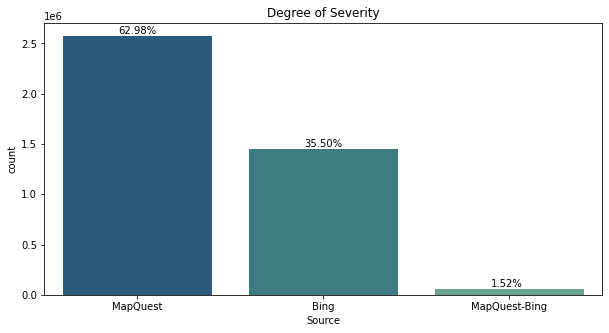

In [18]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Source", data=final_data, orient = 'v', palette = "crest_r", order = final_data['Source'].value_counts().index)
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(final_data.Source))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

### Location

In [115]:
state_counts = final_data["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [19]:
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'ME' 'VT' 'TN' 'NC' 'KS' 'MN' 'LA' 'OK' 'UT' 'CO' 'AZ' 'NM' 'NV'
 'AR' 'MS' 'ID' 'WY' 'MT' 'ND' 'SD']
Total No. of State in Dataset:  49


- Total No. of State in Dataset:  49
- There are 50 states in US
- New York not in dataset

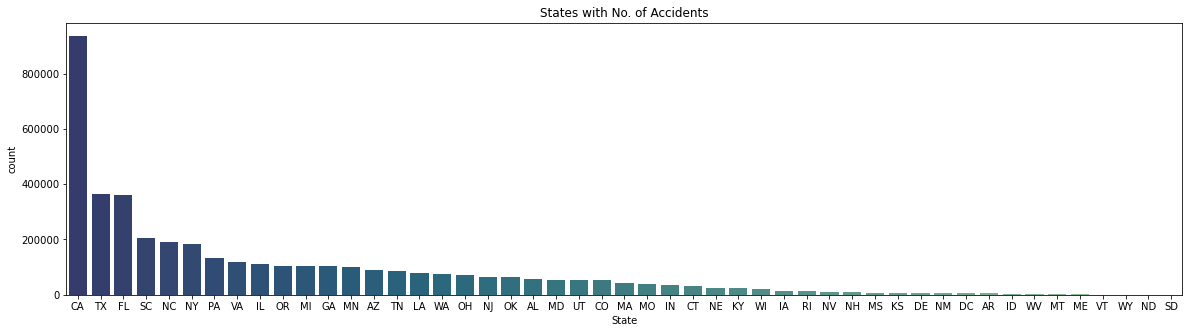

In [20]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=final_data, orient = 'v', palette = "crest_r", order = final_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");

- California (CA) is the 3rd most largest state of US after Texas (TX) and Alaska (AL)
- Also California (CA) is the most populated among all, followed by Texas (TX)
- Alaska (AL) is the largest state but least populated state at 48th rank

In [21]:
print("City Code: ", final_data.City.unique())
print("Total No. of Cities in Dataset: ", len(final_data.City.unique()))

City Code:  ['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Paron' 'Clarksdale'
 'American Fork-Pleasant Grove']
Total No. of Cities in Dataset:  11985


- Total No. of Cities in Dataset:  11985
- There were 19,502 incorporated places registered in the United States

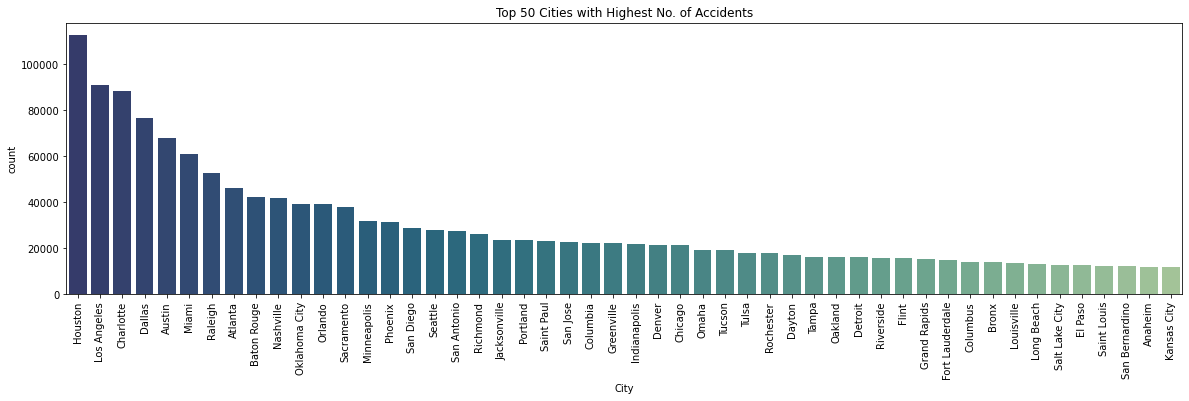

In [22]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

# Timestamp 

In [23]:
final_data.Start_Time = pd.to_datetime(final_data.Start_Time)
final_data.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [24]:
final_data['Month'] = final_data['Start_Time'].dt.month
final_data['Year'] = final_data['Start_Time'].dt.year
final_data['Hour'] = final_data['Start_Time'].dt.hour
final_data['Weekday'] = final_data['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = final_data[final_data.Start_Time.dt.year == 2016]
data_2017 = final_data[final_data.Start_Time.dt.year == 2017]
data_2018 = final_data[final_data.Start_Time.dt.year == 2018]
data_2019 = final_data[final_data.Start_Time.dt.year == 2019]
data_2020 = final_data[final_data.Start_Time.dt.year == 2020]
data_2017_2019 = final_data[(final_data["Year"] >= 2017) & (final_data["Year"] <= 2019)]

### Yearly

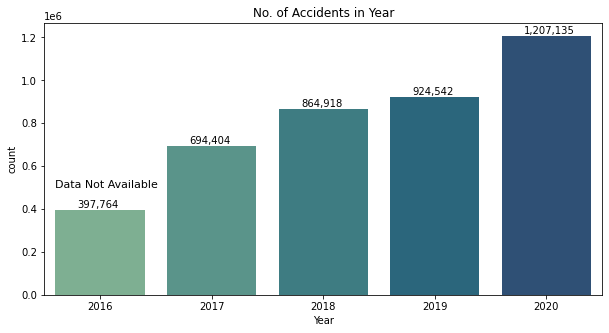

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=final_data, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

### Monthly

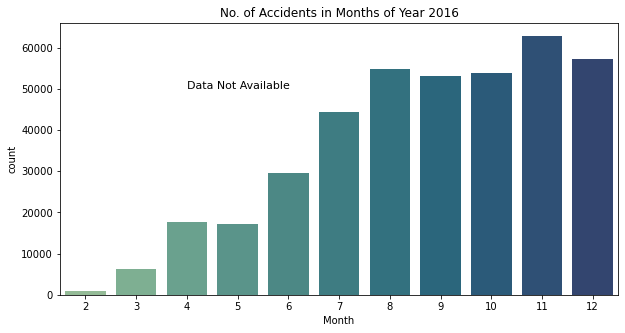

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

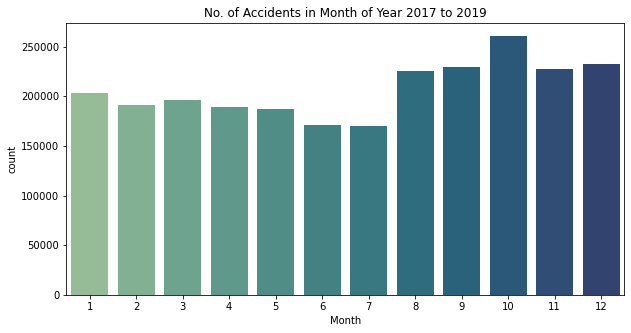

In [27]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()

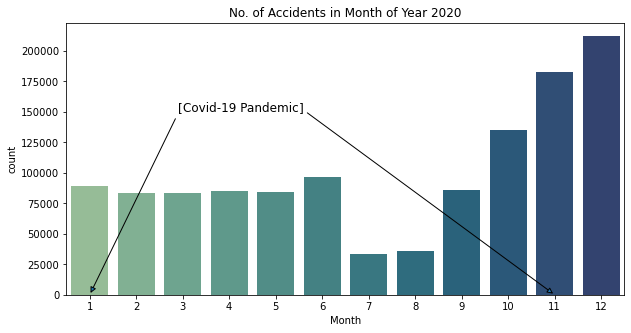

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(2,150000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(4.5,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

## Weekly

### All Weeks of Year 2016

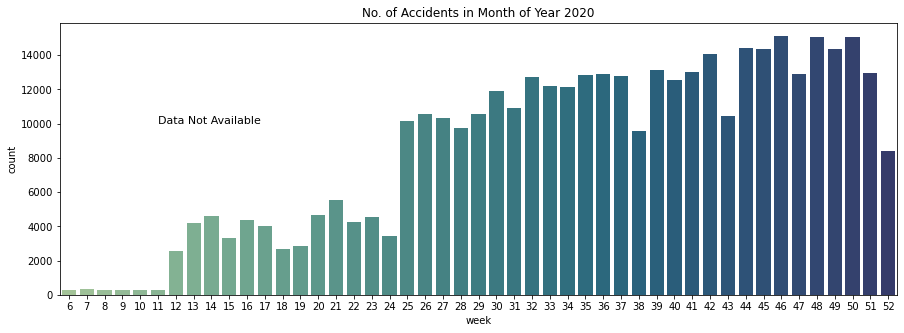

In [72]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(5,10000), fontsize=11)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

### All Weeks of Year 2017 to 2019

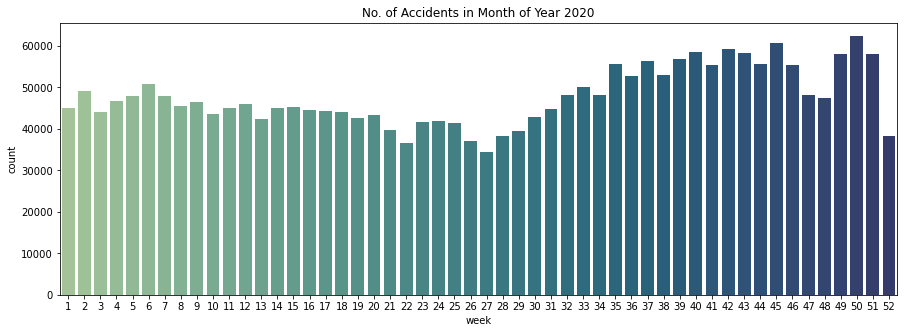

In [73]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2017_2019.Start_Time.dt.isocalendar().week, data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

### All Weeks of Year 2020

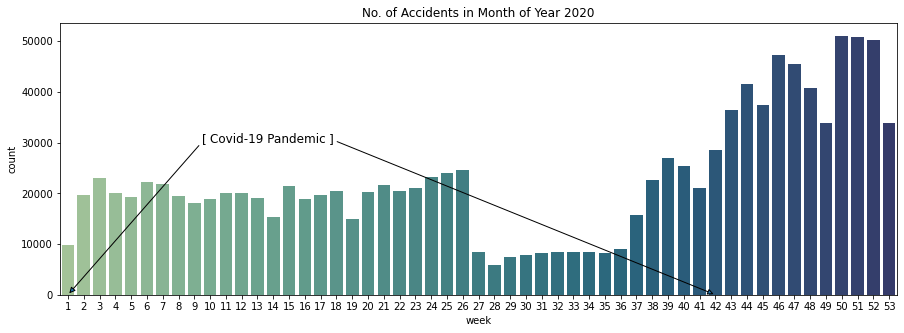

In [76]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2020.Start_Time.dt.isocalendar().week, data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(9,30000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(8.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(41,0),xytext=(16.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

Weekdays

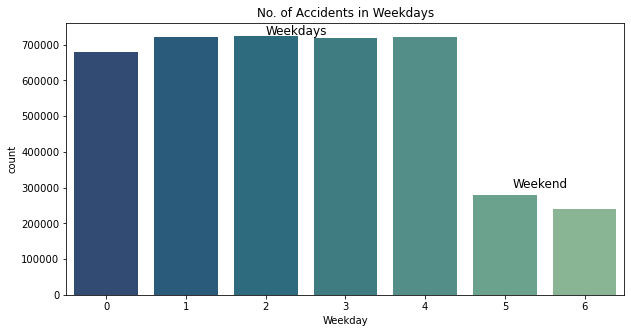

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=final_data, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,728000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,300000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

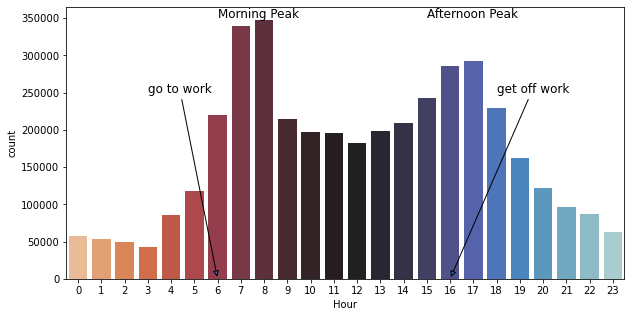

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=final_data, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

## Severity

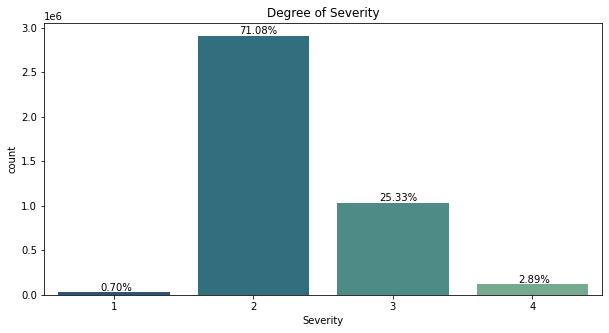

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=final_data, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(final_data.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

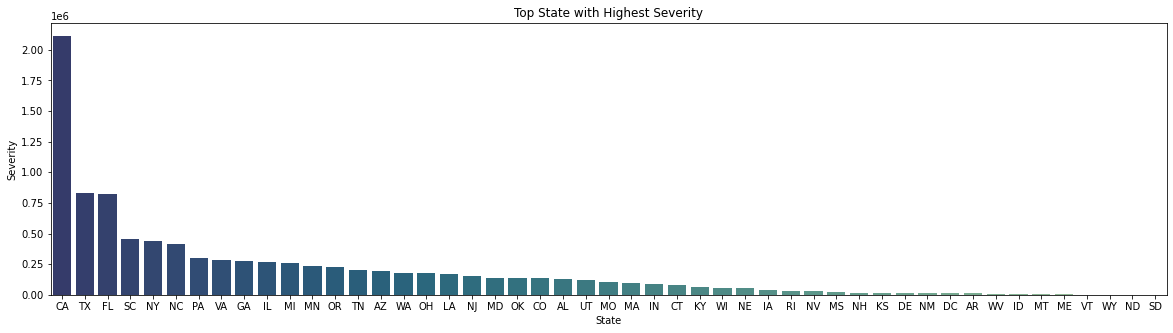

In [36]:
df_state = final_data.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()

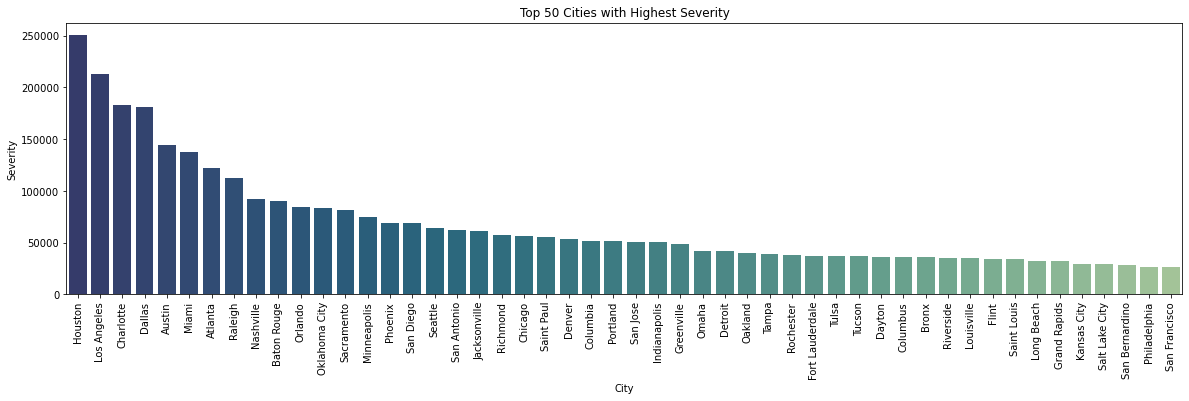

In [37]:
df_city = final_data.groupby('City').sum('Severity')[['Severity']]
df_city = df_city.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'City', y = 'Severity', data = df_city, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest Severity")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

### Weather Stimuli Impact

#### Related Columns

In [48]:
final_data.iloc[:5, 18:27]

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain
1,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain
2,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast
3,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy
4,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy


### Location Impact

#### Related Columns

In [70]:
final_data.iloc[:5, 27:40]

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False


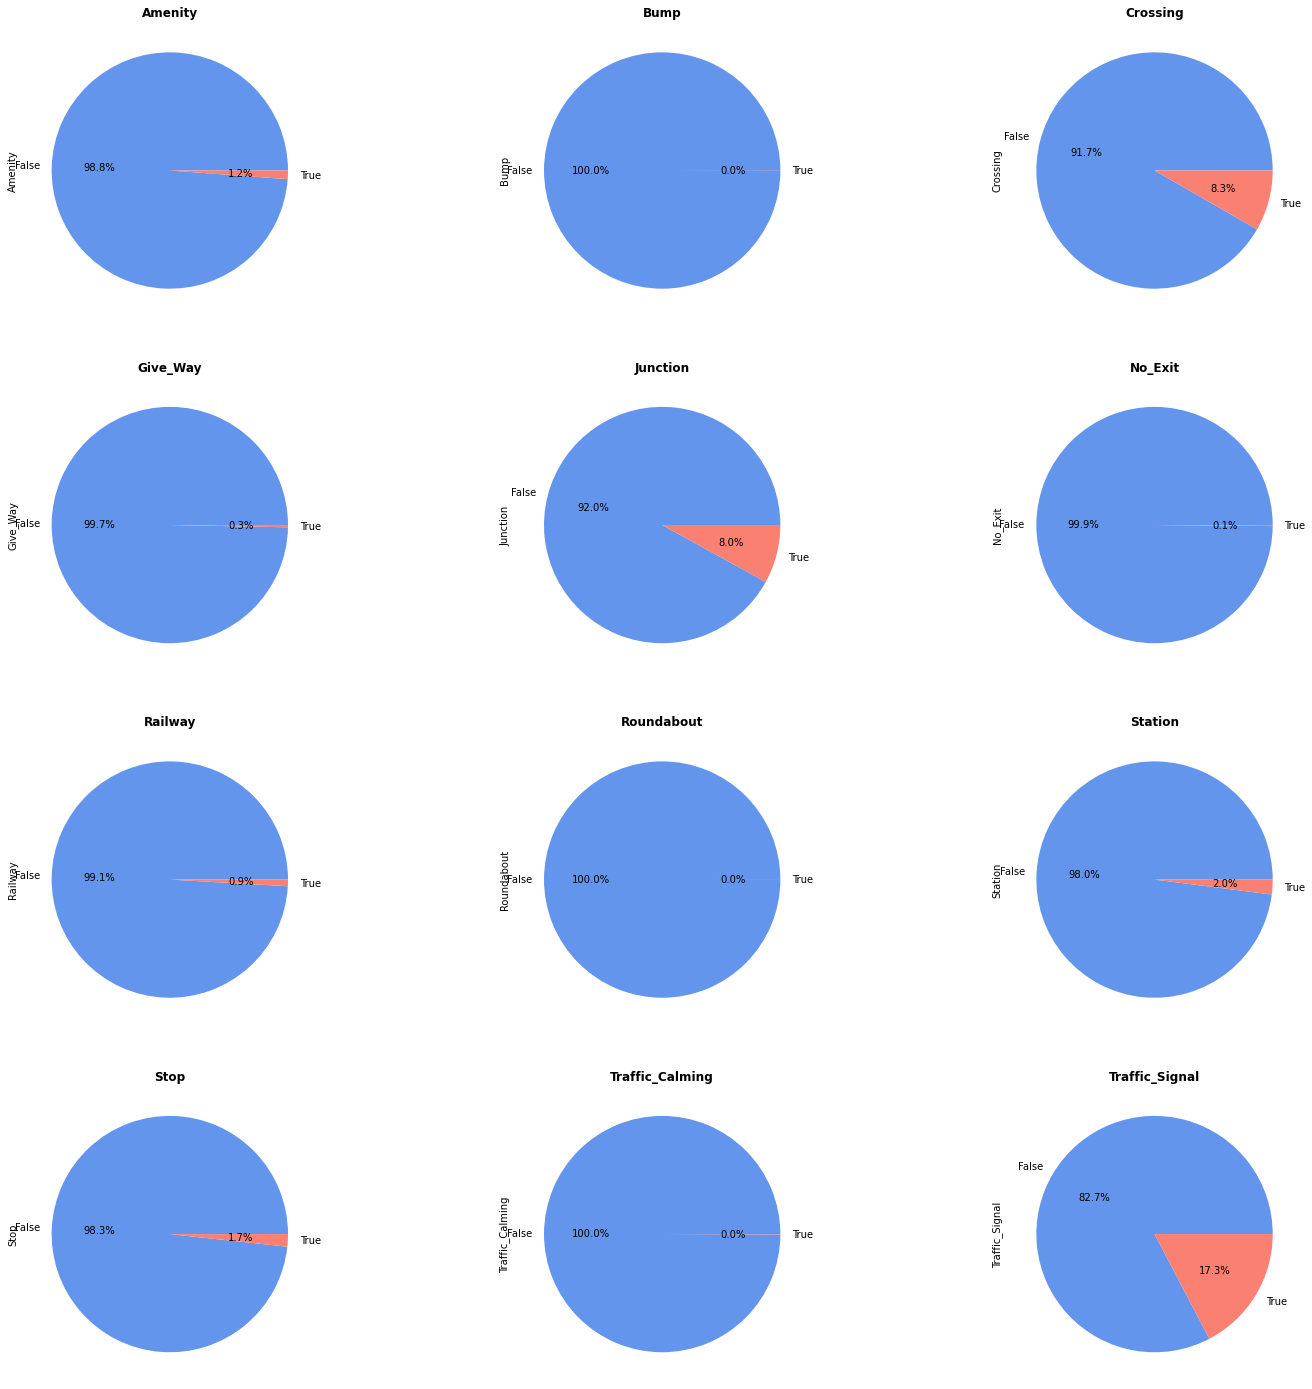

In [134]:
f,ax=plt.subplots(4,3,figsize=(25,25))
ax[0,0] = final_data['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["cornflowerblue","salmon"])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = final_data['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["cornflowerblue","salmon"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = final_data['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["cornflowerblue","salmon"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = final_data['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["cornflowerblue","salmon"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = final_data['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["cornflowerblue","salmon"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = final_data['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["cornflowerblue","salmon"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = final_data['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["cornflowerblue","salmon"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = final_data['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["cornflowerblue","salmon"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = final_data['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["cornflowerblue","salmon"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = final_data['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["cornflowerblue","salmon"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = final_data['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["cornflowerblue","salmon"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = final_data['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["cornflowerblue","salmon"])
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")
plt.show()